In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [14]:
df = pd.read_csv('/content/perrin-freres-monthly-champagne-.csv',parse_dates=['Month'])

In [15]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [16]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [17]:
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [18]:
df.drop(106,axis=0,inplace=True)

In [19]:
df.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [20]:
df.drop(105,axis=0,inplace=True)


In [21]:
df.set_index('Month',inplace=True)

In [22]:
df.head()

,Sales
Month,
1964-01,2815.0
1964-02,2672.0
1964-03,2755.0
1964-04,2721.0
1964-05,2946.0


In [23]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


Visualize the data

<Axes: xlabel='Month'>

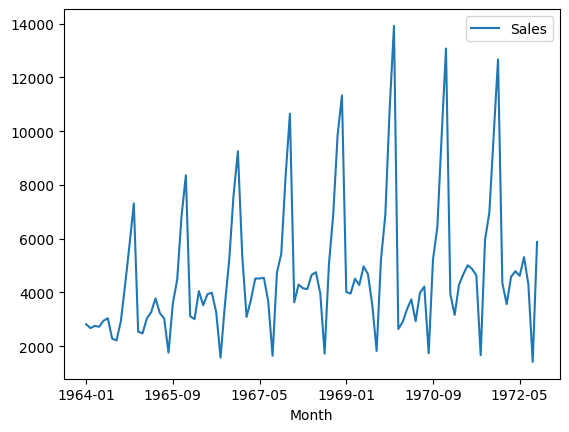

In [24]:
df.plot()

In [25]:
#testing for stationarity
from statsmodels.tsa.stattools import adfuller

In [28]:
test_result = adfuller(df['Sales'])
print("ADF:",test_result[0])

ADF: -1.8335930563276215


Deffrencing

In [29]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [30]:
df['Sales'].shift(1)

,Sales
Month,
1964-01,NaN
1964-02,2815.0
1964-03,2672.0
1964-04,2755.0
1964-05,2721.0
...,...
1972-05,4788.0
1972-06,4618.0
1972-07,5312.0


In [31]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [32]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01,2815.0,NaN,NaN
1964-02,2672.0,-143.0,NaN
1964-03,2755.0,83.0,NaN
1964-04,2721.0,-34.0,NaN
1964-05,2946.0,225.0,NaN
1964-06,3036.0,90.0,NaN
1964-07,2282.0,-754.0,NaN
1964-08,2212.0,-70.0,NaN
1964-09,2922.0,710.0,NaN


In [34]:
adfuller(df['Seasonal First Difference'].dropna())

(np.float64(-7.626619157213166),
 np.float64(2.0605796968136632e-11),
 0,
 92,
 {'1%': np.float64(-3.503514579651927),
  '5%': np.float64(-2.893507960466837),
  '10%': np.float64(-2.583823615311909)},
 np.float64(1294.7753384560438))

<Axes: xlabel='Month'>

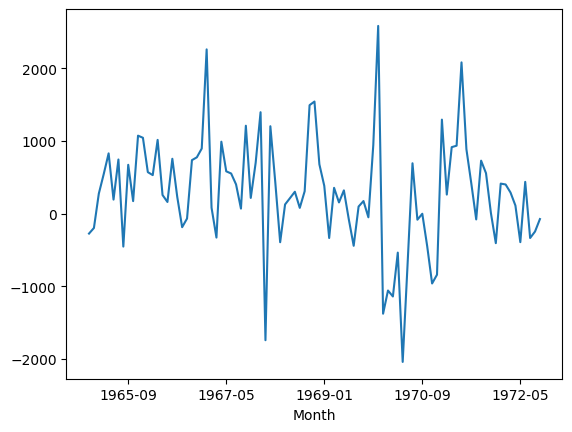

In [35]:
df['Seasonal First Difference'].plot()

AR Model

In [55]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

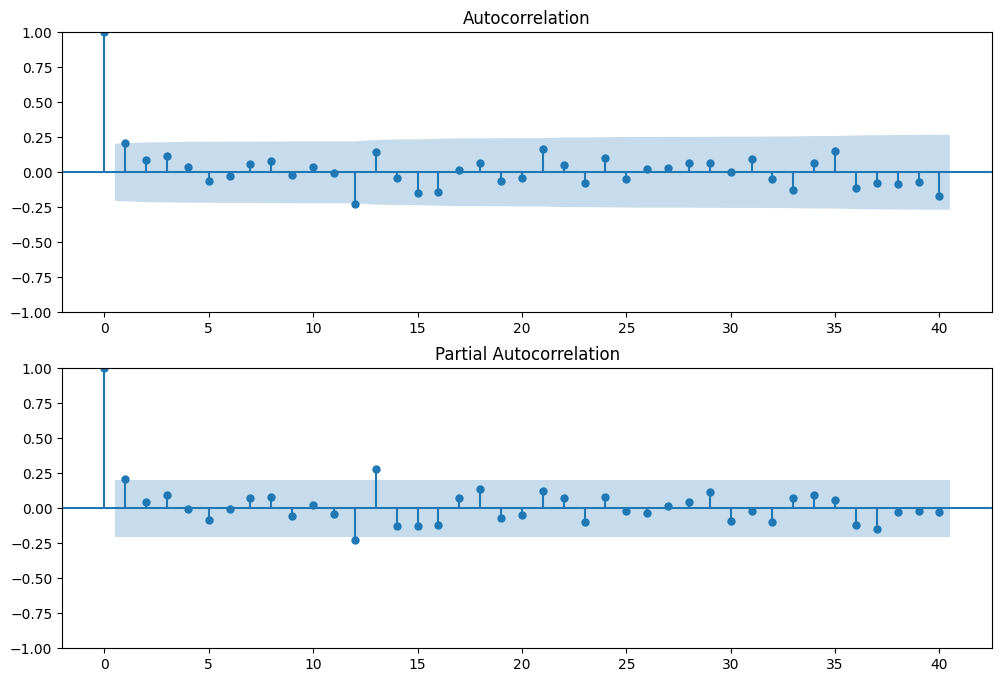

In [56]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [82]:
from statsmodels.tsa.arima.model import ARIMA

In [83]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [76]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Thu, 27 Mar 2025   AIC                           1911.627
Time:                        19:08:55   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      4.001      0.000       0.232       0.677
ma.L1         -0.9667      0.056    -17.329      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.472      0.000    4.02e+06    6.44e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

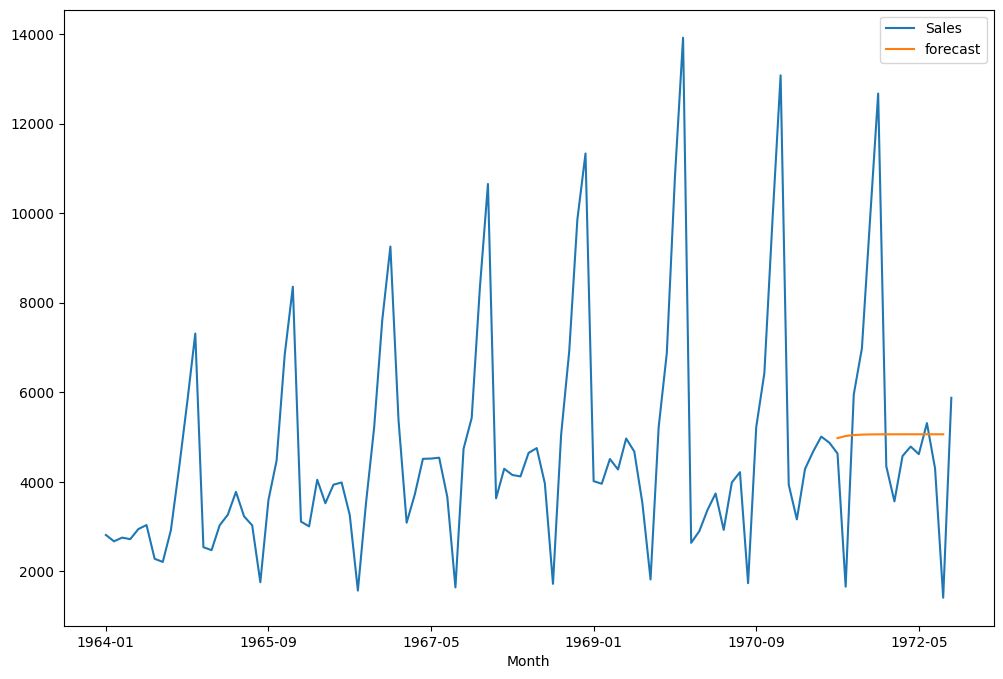

In [69]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [77]:
X=df.values
train=X[:len(X)-7]
test=X[len(X)-7:]

In [80]:
model_fit=model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Thu, 27 Mar 2025   AIC                           1911.627
Time:                        19:11:28   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      4.001      0.000       0.232       0.677
ma.L1         -0.9667      0.056    -17.329      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.472      0.0